<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/AirBnB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment & Run Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#Load Data

In [2]:
#Read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1W0NsV0GCNVzthblss4PS41XF6I4_YpXr-NTDKWiCfHA/edit#gid=1399814193'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
pd.set_option('display.max_columns', None)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df.shape))

dataset has 48895 rows and 16 columns


#Basic steps
1. Check Variable Names

2. Check Data Type

3. Handle Missing Values

4. Check Duplicate Records

5. Checking Summary Statistics

##1. Check Variable Names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.

In [4]:
#Check columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

There is nothing wrong with the column names

##2. Check Data Type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [5]:
#Check data type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about id, host_id, last_review.

In [6]:
#Change data type
df['id'] = df['id'].astype('object')
df['host_id'] = df['host_id'].astype('object')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%M-%d')
df['last_review'].dtype.type
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                  object
longitude                                 object
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

##3. Handle Missing Values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [7]:
#Check the amount of missing values
def nulls(df):
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0] / len(df)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df)

,count,%pct
last_review,10052,0.205583
reviews_per_month,10052,0.205583
host_name,21,0.000429
name,16,0.000327


From the results above, we know that the most missing values are the last_review, reviews_per_month, host_name columns. in the last_review &, review_per_month columns there is the same amount of empty data, it can be assumed that the accommodation in question has no reviews at all, this could happen perhaps because no user has decided to stay at that place or even the place has never been rented, this is This is normal in business so this empty data will be left. For missing data less than 5% I will drop rows.

In [8]:
#Remove missing values
df = df.dropna(subset = ['host_name', 'name'])
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##4. Check Duplicate Rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [9]:
#Check for duplicate data
df.duplicated().sum()

0

So, they are not duplicated rows.

##5. Checking Summary Statistics

In [10]:
#Statistics of numerical columns
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,38821.000000,48858.000000,48858.000000
mean,152.740309,7.012444,23.273098,1.373229,7.148369,112.801425
std,240.232386,20.019757,44.549898,1.680328,32.964600,131.610962
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#Statistics of non-numerical columns
df.describe(include = np.object_)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type
count,48858,48858,48858,48858,48858,48858,48858,48858,48858
unique,48858,47871,37425,11450,5,221,19039,14716,3
top,2539,Hillside Hotel,219517861,Michael,Manhattan,Williamsburg,4.071.813,-7.395.677,Entire home/apt
freq,1,18,327,417,21643,3917,18,18,25393


In the price column there is minimum data of 0, the price should not be 0. So we have to delete this data.

In [12]:
#Displays data from the price row which has a value of 0
df.loc[df['price'] == 0].index

Int64Index([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259,
            26841, 26866],
           dtype='int64')

In [13]:
#Delete data from the price row that has a value of 0
df = df.drop([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259,
              26841, 26866])

In [14]:
#Statistics of numerical price column
df['price'].describe()

count    48847.000000
mean       152.774705
std        240.248498
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#Export the File
Export cleaned data.

In [15]:
#Show dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,4.064.749,-7.397.237,Private room,149,1,9,2018-01-19 00:10:00,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4.075.362,-7.398.377,Entire home/apt,225,1,45,2019-01-21 00:05:00,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,4.080.902,-739.419,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,4.068.514,-7.395.976,Entire home/apt,89,1,270,2019-01-05 00:07:00,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4.079.851,-7.394.399,Entire home/apt,80,10,9,2018-01-19 00:11:00,0.10,1,0


In [16]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df.shape))

dataset has 48847 rows and 16 columns


In [17]:
#Export data
df.to_csv('AirBnB_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

##1. Eksplorasi Neighbourhood Group

In [18]:
#Number of AirBnB neighborhood groups
a = df['neighbourhood_group'].value_counts().reset_index()
a.columns = ['neighbourhood_group','count']
a['%'] = a['count']/a['count'].sum() * 100
a

,neighbourhood_group,count,%
0,Manhattan,21642,44.305689
1,Brooklyn,20080,41.107949
2,Queens,5664,11.595390
3,Bronx,1088,2.227363
4,Staten Island,373,0.763609


<Axes: xlabel='neighbourhood_group', ylabel='count'>

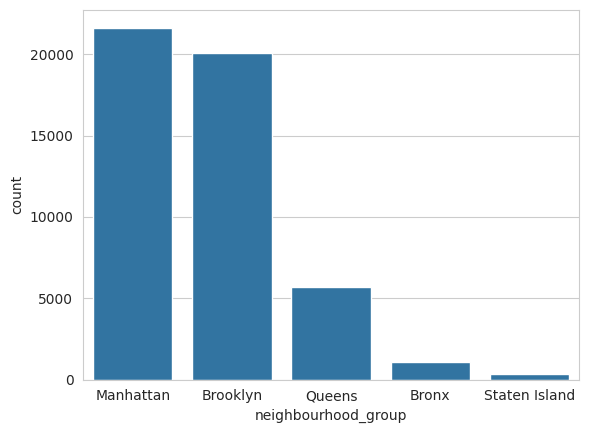

In [19]:
#Bar chart of neighborhood groups
sns.barplot(data = a, x ='neighbourhood_group',y ='count')

In [20]:
#Number of AirBnB neighbourhood
h = df.neighbourhood.value_counts().reset_index()
h.columns = ['neighbourhood','counts']
h.head()

,neighbourhood,counts
0,Williamsburg,3916
1,Bedford-Stuyvesant,3709
2,Harlem,2655
3,Bushwick,2459
4,Upper West Side,1969


##2. Room Type

In [21]:
#Number of room type
b = df['room_type'].value_counts().reset_index()
b.columns = ['room_type','counts']
b['%'] = b['counts']/b['counts'].sum()*100
b

,room_type,counts,%
0,Entire home/apt,25391,51.980674
1,Private room,22299,45.650705
2,Shared room,1157,2.368620


<Axes: xlabel='room_type', ylabel='counts'>

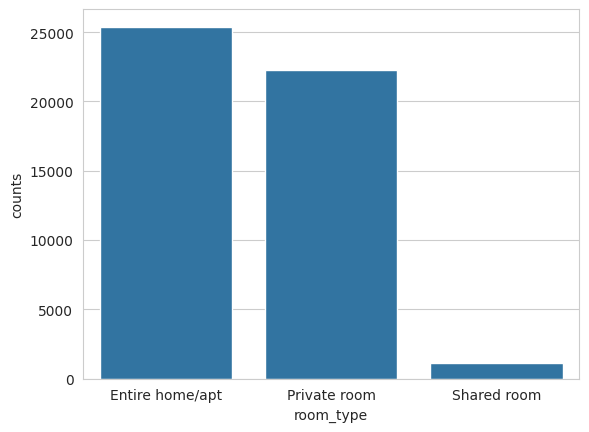

In [22]:
#Bar chart of type room
sns.barplot(data = b, x ='room_type',y ='counts')

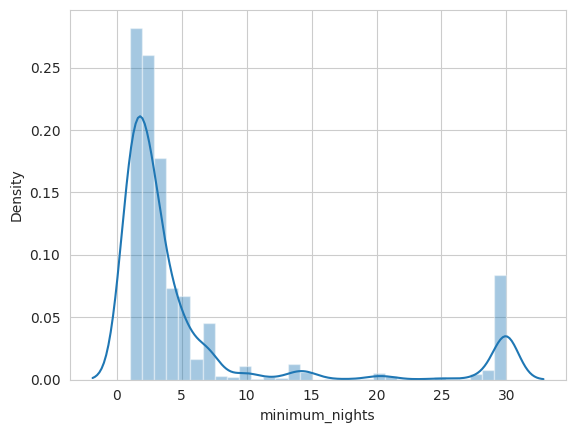

In [23]:
#AirBnB minimum night
sns.distplot(df[(df['minimum_nights']<=30) & (df['minimum_nights'] > 0)]['minimum_nights'],bins = 31)
plt.show()

##3. Price

<Axes: xlabel='neighbourhood_group', ylabel='price'>

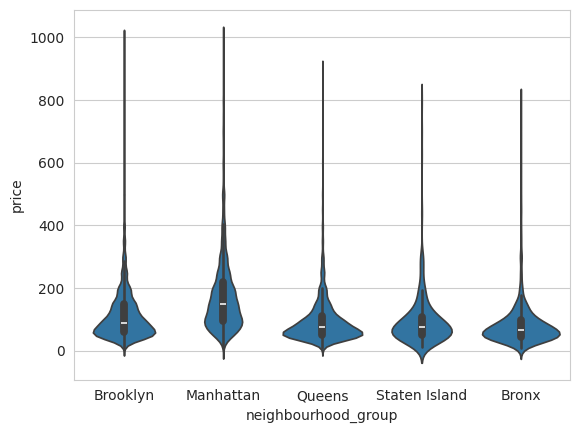

In [24]:
#Visualize with a violin diagram
d = df[df.price < 1000]
sns.violinplot(d, x='neighbourhood_group', y='price')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

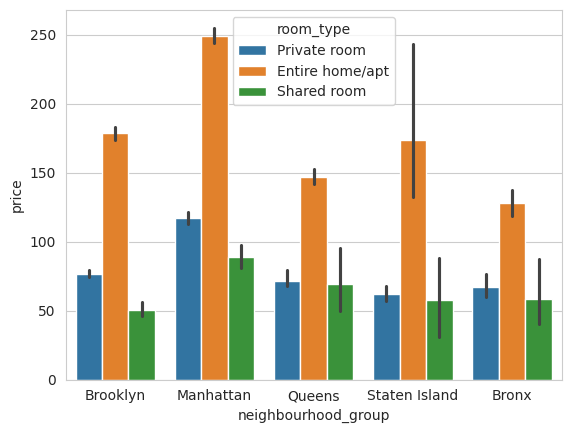

In [25]:
#Visualization of the number of room types and prices
sns.barplot (df,  x = 'neighbourhood_group', y = 'price', hue = 'room_type')

In [26]:
#Comparison of several prices
label_name = ['Budget friendly','Average','Expensive','Exravagant']
range = [0,69, 106,175 ,np.inf]
df['price_range'] = pd.cut(df['price'],bins = range, labels = label_name)
price_group = df.groupby(['price_range','neighbourhood_group'])['price_range'].count()
print(price_group)

price_range      neighbourhood_group
Budget friendly  Bronx                   573
                 Brooklyn               6557
                 Manhattan              2510
                 Queens                 2547
                 Staten Island           162
Average          Bronx                   304
                 Brooklyn               5417
                 Manhattan              4648
                 Queens                 1610
                 Staten Island           114
Expensive        Bronx                   149
                 Brooklyn               4849
                 Manhattan              6218
                 Queens                  967
                 Staten Island            55
Exravagant       Bronx                    62
                 Brooklyn               3257
                 Manhattan              8266
                 Queens                  540
                 Staten Island            42
Name: price_range, dtype: int64


<Axes: xlabel='neighbourhood_group', ylabel='count'>

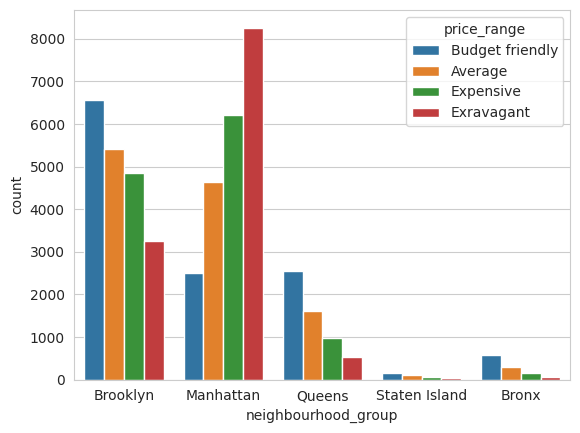

In [27]:
#Displays data in the form of a bar chart
sns.countplot(df, x='neighbourhood_group', hue = 'price_range')

In [28]:
#Top 5 review
top_5_airbnb_best_review = df.sort_values(by='number_of_reviews', ascending=False).head()
top_5_airbnb_best_review[['id', 'name', 'neighbourhood_group', 'neighbourhood', 'number_of_reviews']]

,id,name,neighbourhood_group,neighbourhood,number_of_reviews
11759,9145202,Room near JFK Queen Bed,Queens,Jamaica,629
2031,903972,Great Bedroom in Manhattan,Manhattan,Harlem,607
2030,903947,Beautiful Bedroom in Manhattan,Manhattan,Harlem,597
2015,891117,Private Bedroom in Manhattan,Manhattan,Harlem,594
13495,10101135,Room Near JFK Twin Beds,Queens,Jamaica,576
